This project focuses on predicting if a person has a heart disease using Machine Learning Models. 
Based on attributes such as blood pressure, cholestrol levels, heart rate, type of angina experiences, stress level and other characteristic attributes, patients will be classified according to varying degrees of coronary artery diseases.

This project shows a detailed methodology of building the classification-prediction model and involves the following steps : 
- ***1) Importing packages and Collecting Data***
- ***2) Variable Description and Identification***
    - 2.1 - Categorical and Numerical Variables
    - 2.2 - Variables Data Types
    - 2.3 - Data Description
    - 2.4 - Missing Variables
- ***3) Data Preprocessing***
    - 3.1 - Process age
    - 3.2 - Process Sex
    - 3.3 - Outliers Detection
         - Outliers for Age
         - Outliers for Sex
- ***4) Data Exploration***
    - 4.1) Count Plot - People affected with Heart Disease
    - 4.2) Bar Graph and Count Plot - For Sex vs Heart dieases
    - 4.3) Subplots for each feature of dataset
    - 4.4) Now create the heatmap correlation of data
    - 4.5) Countplot : Analyzing the cases where the person had a heart disease
    - 4.6) Univariate graph for age
    - 4.7) Scatterplot: Relationship between age and maximum heartrate acheived
    - 4.8) Scatterplot - Relationship between age and blood pressure
    - 4.9) Pre-processing- Standardization, or mean removal and variance scaling
- ***5) Model Building and Evaluation***
    - 5.1 - Creating Training and Testing Datasets
    - 5.2 - CModel Building
         - 5.2.1 - Random Forest Classifier
         - 5.2.2 - Gradient Boosting Classifier
         - 5.2.3 - Decision Tree Classifier
    - 5.3 - Retrain and Predict Using Optimized Hyperparameters
- ***6) Comparison between the models***
- ***7) Cross-validation: Evaluating estimator performance***
    - 7.1 - K-Fold Cross Validation
    - 7.2 - Tuning Hyperparameters
- ***8) Different Ensemble Methods***
    - 8.1 - Simple Ensemble Methods
    - 8.1 - Advanced Ensemble Methods
         - 8.2.1 - Bagging

## Problem Description 

The goal of this work is to predict the binary class target, which represents whether or not a patient has heart disease:

0 represents no heart disease present
1 represents heart disease present

Also, exploring the major parameters that increases the chances of a heart attack in a human being.

# 1) - Importing packages and Collecting Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [2]:
data = pd.read_csv('heart.csv')

data.head(10)

# 2) - Variable Description and Identification

Describe what each of the variable indicates and identify our response and predictor variables , then seperate the categorical variables from numerical variables and finally identify pandas data types (i.e., object, float64 or int64) for every variable.

### Changing the column names to have a clear understanding of features.

In [3]:
data.columns = ['age','sex','chest_pain','rest_bp','cholestrol','fst_bloodsug','rest_ecg','max_heartrate','exe_induced_angina','st_depression','st_slope','majorvess_no','blood_disorder','heart_disease']

In [4]:
data.head()

,age,sex,chest_pain,rest_bp,cholestrol,fst_bloodsug,rest_ecg,max_heartrate,exe_induced_angina,st_depression,st_slope,majorvess_no,blood_disorder,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's see the shape of our dataset

In [5]:
data.shape

(303, 14)

We can see total 14 variables. And each variable has 303 observations


### Here comes the description of all variables:

- ***age*** : age in years

- ***sex*** : (1 = male; 0 = female)

- ***chest pain :***
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

- ***trestbps***:resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

- ***cholestrol*** : serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern

- ***fst_bloodsug*** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes

- ***rest_ecg*** : resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber

- ***max_heartrate*** : maximum heart rate achieved

- ***exe_induced_angina*** : exercise induced angina (1 = yes; 0 = no)

- ***st_depression*** : ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

- ***st_slope*** : the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downsloping: signs of unhealthy heart

- ***majorvess_no*** : number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)

- ***blood_disorder*** : thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising

- ***heart_disease*** : have disease or not (1=yes, 0=no) (= the predicted attribute)

#### Here, heart_disease is the target variable and rest of the variables are predictor variables.


## 2.1 - Categorical and Numerical Variables

All variables of dataset are Numerical

## 2.2 - Variable Data Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 303 non-null    int64  
 1   sex                 303 non-null    int64  
 2   chest_pain          303 non-null    int64  
 3   rest_bp             303 non-null    int64  
 4   cholestrol          303 non-null    int64  
 5   fst_bloodsug        303 non-null    int64  
 6   rest_ecg            303 non-null    int64  
 7   max_heartrate       303 non-null    int64  
 8   exe_induced_angina  303 non-null    int64  
 9   st_depression       303 non-null    float64
 10  st_slope            303 non-null    int64  
 11  majorvess_no        303 non-null    int64  
 12  blood_disorder      303 non-null    int64  
 13  heart_disease       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- One float variable: st_depression
- The others variables are integer type

## 2.3 - Data Description

In [7]:
# Description of the data variables
data.describe()

,age,sex,chest_pain,rest_bp,cholestrol,fst_bloodsug,rest_ecg,max_heartrate,exe_induced_angina,st_depression,st_slope,majorvess_no,blood_disorder,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2.4 - Missing values

In [8]:
data.isnull().sum()

age                   0
sex                   0
chest_pain            0
rest_bp               0
cholestrol            0
fst_bloodsug          0
rest_ecg              0
max_heartrate         0
exe_induced_angina    0
st_depression         0
st_slope              0
majorvess_no          0
blood_disorder        0
heart_disease         0
dtype: int64

As we can see , we don't have missing values in our dataset

# 3) - Data Preprocessing

In this section, we transform raw data into understandable format , We would engineer features like Age, Sex


## 3.1 - Process Age

In [9]:
# let's preview the age again.
data['age'].head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [10]:
# Let's manully understand the Age column.
data['age'].value_counts().head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

## 3.2 - Process Sex

In [11]:
# let's preview the sex column.
data['sex'].head()

0    1
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

In [12]:
# Let's manully understand the sex column.
data['sex'].value_counts().head()

1    207
0     96
Name: sex, dtype: int64

- 1 : for male , 0 : for female
- in Age column we have 207 male (age = 1 ) and 96 female (age = 0)

## 3.3 - Outliers Detection

In statistics, an outlier is a data point that significantly differs from the other data points in a sample. 
Often, outliers in a data set can alert statisticians to experimental abnormalities or errors in the measurements taken, which may cause them to omit the outliers from the data set. 
If they do omit outliers from their data set, significant changes in the conclusions drawn from the study may result.


***We will use IQR method to detect the outliers for variable Cholestrol , max_heartrate and st_depression though we won't remove them.***

In [13]:
# Create a function to count total outliers.
def outliers(variable):
    global filtered # Global keyword is used inside a function only when we want to do assignments or when we want to change a variable.
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

### Outliers detection for Cholestrol

In [14]:
# Total number of outliers in cholestrol
outliers(data['cholestrol'])

Total Outliers of cholestrol : 5


Text(0.5, 1.0, 'Cholestrol distribution with outliers')

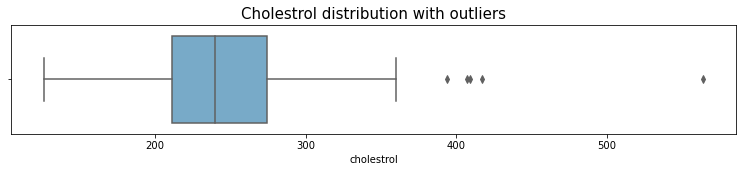

In [15]:
# Visualisation of cholestrol distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=data["cholestrol"],palette='Blues')
plt.title('Cholestrol distribution with outliers', fontsize=15 )

### Outliers detection for st_depression

In [16]:
# Total number of outliers in st_depression
outliers(data['st_depression'])

Total Outliers of st_depression : 5


Text(0.5, 1.0, 'st_depression distribution with outliers')

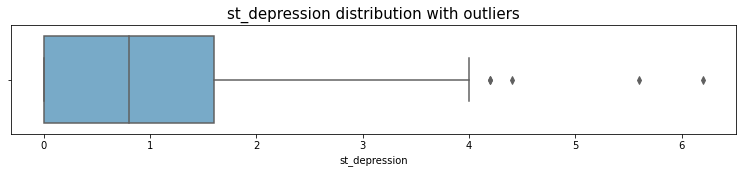

In [17]:
# Visualisation of cholestrol distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=data["st_depression"],palette='Blues')
plt.title('st_depression distribution with outliers', fontsize=15 )

# 4) Data Exploration

## 4.1) Count Plot - People affected with Heart Disease

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


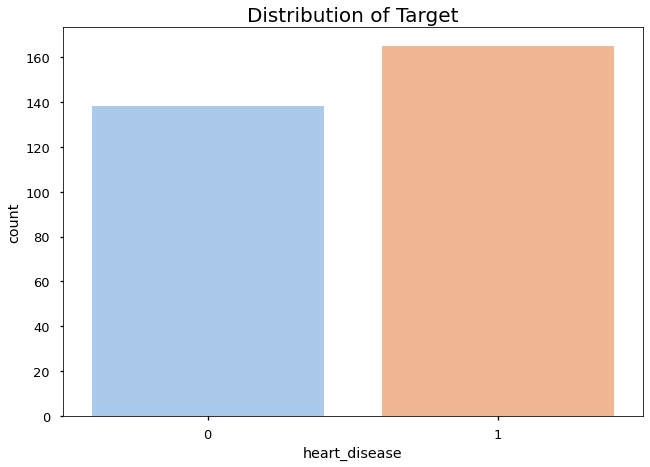

In [18]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['heart_disease'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

- 0 : is for people who don't have affected with Heart Disease , and 1 : is for people affected with Heart Disease
- As we can see from Count Plot there are above 160 patients suffering from heart disease and there are about 130 patients who do not have any heart disease.

## 4.2) Bar Graph and Count Plot - For Sex vs Heart dieases

Text(0, 0.5, 'count')

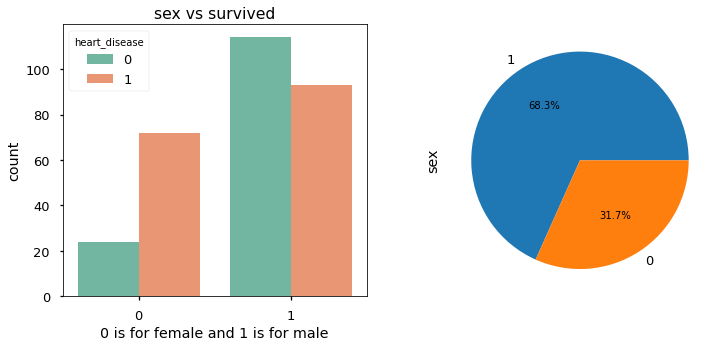

In [19]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
data['sex'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[0].set_title("sex vs survived")
sns.countplot(data=data,x='sex',hue='heart_disease',palette='Set2',ax=ax[0])
ax[0].set_xlabel("0 is for female and 1 is for male")
ax[0].set_ylabel("count")

- 1) Number of males affected by heart- diseases are more than females
- 2) 93 Males and 72 Females are affected by heart dieases

## 4.3) Subplots for each feature of dataset


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

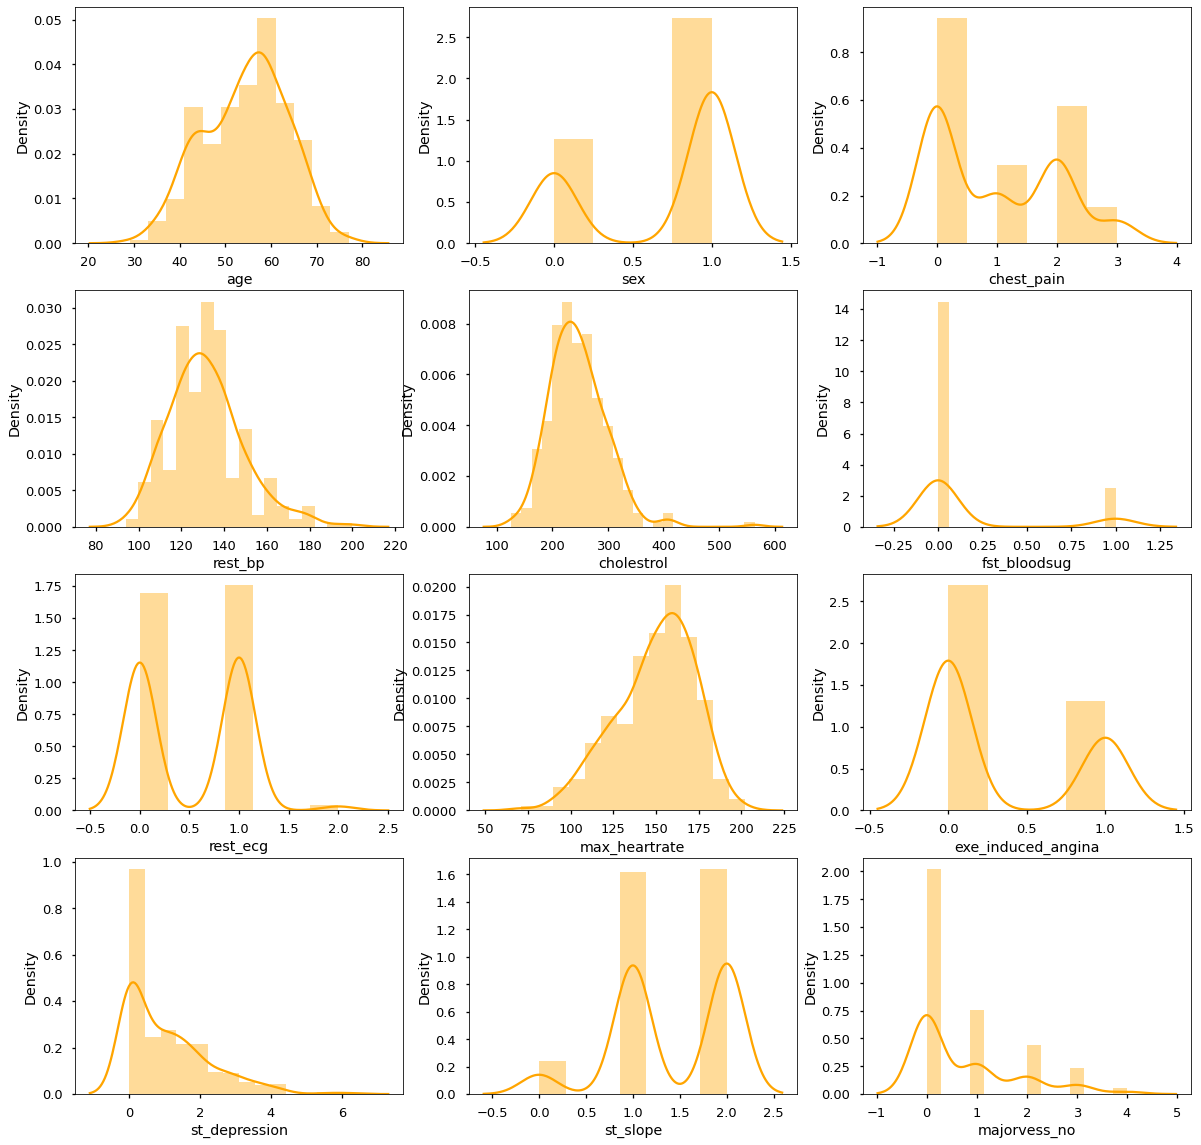

In [20]:
ax=plt.subplots(4,3,figsize=(20,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(data.iloc[:,i],kde=True, color='orange')

- 1) It can be seen that many of the attributes are evenly distributed accross the objects.
- 2) There are many data points for males than females.

## 4.4) Now create the heatmap correlation of data

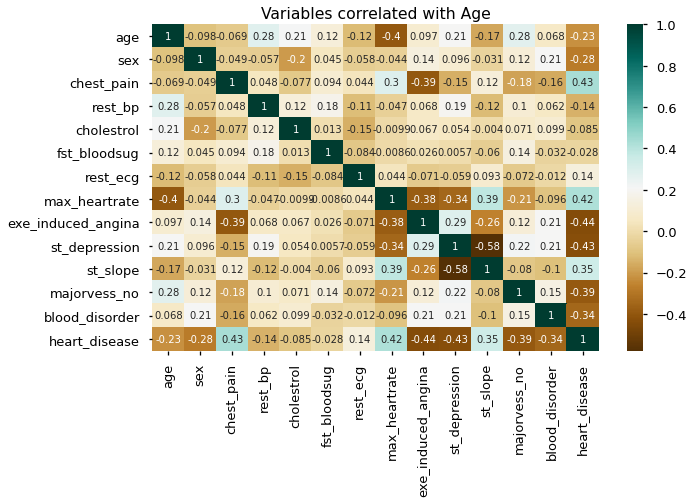

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap ='BrBG',annot = True)
plt.title('Variables correlated with Age')
plt.show()

1) We can see that there is a positive corelation of the people having heart disease with : 
- chest_pain
- max_heartrate
- st_slope
- This was also evidently seen in the countplots above.


2) We can also see that there is a strong negative correlation of people having heart diseases with :

- exe_induced_angina
- st_depression
- majorvess_no
- This was also evidently seen in the countplots above. We had seen that there was higher count of people with     - heart diseases with lower the number of major blood vessels.


3) We also see a negative correlation between resting blood pressure, which is evident from the fact that a lower resting blood pressure is an indication of a healthy heart.

## 4.5) Countplot : Analyzing the cases where the person had a heart disease

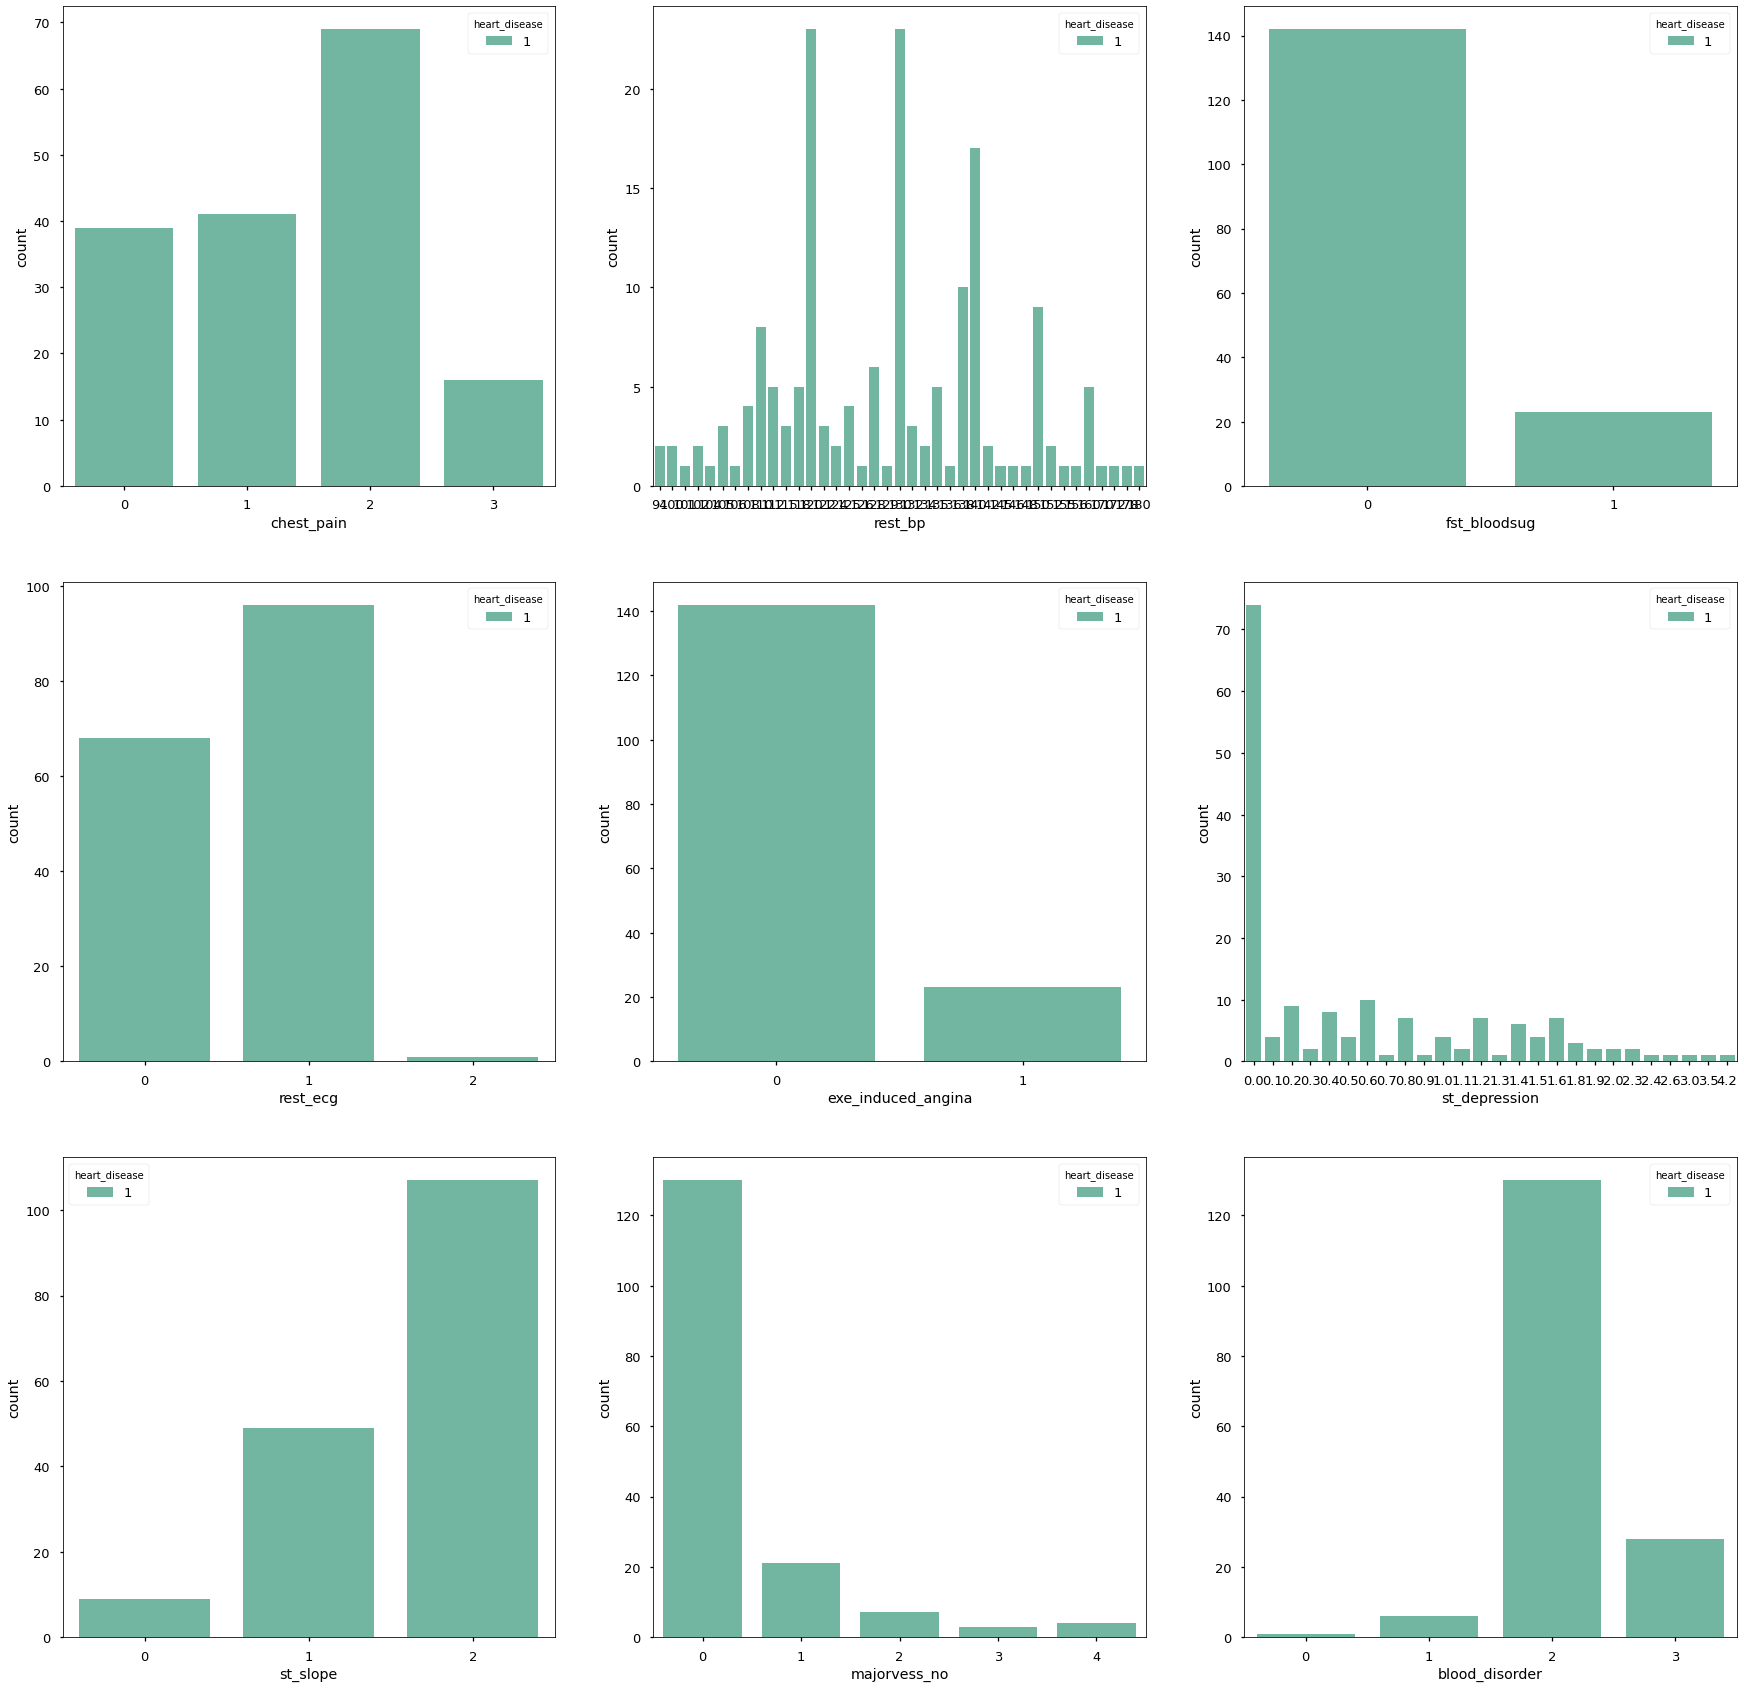

In [22]:
heart_disease_plot_df=data[data.heart_disease != 0]
heart_disease_plot_df=heart_disease_plot_df.drop('age', axis=1)
heart_disease_plot_df=heart_disease_plot_df.drop('sex', axis=1)
heart_disease_plot_df=heart_disease_plot_df.drop('cholestrol', axis=1)
heart_disease_plot_df=heart_disease_plot_df.drop('max_heartrate', axis=1)
ax=plt.subplots(3,3,figsize=(30,30))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.countplot(x=heart_disease_plot_df.iloc[:,i],data = heart_disease_plot_df, hue = 'heart_disease',palette='Set2')
    
plt.show()

- 1) Number of people having non-anginal chest pain having heart diseases is higher
- 2) We can also see that people having a lower resting bp have a lower count of having a heart disease & vice-versa
- 3) Lot many people having a lower blood sugar have heart diseases
- 4) The count of people having heart disease due to non-exercise induced angina is more.
- 5) There are many cases of people having heart diseases with Downsloping i.e. sign of unhealthy heart
- 6) Many people having lower number of major blood vessels, had heart disease.

## 4.6) Univariate graph for age

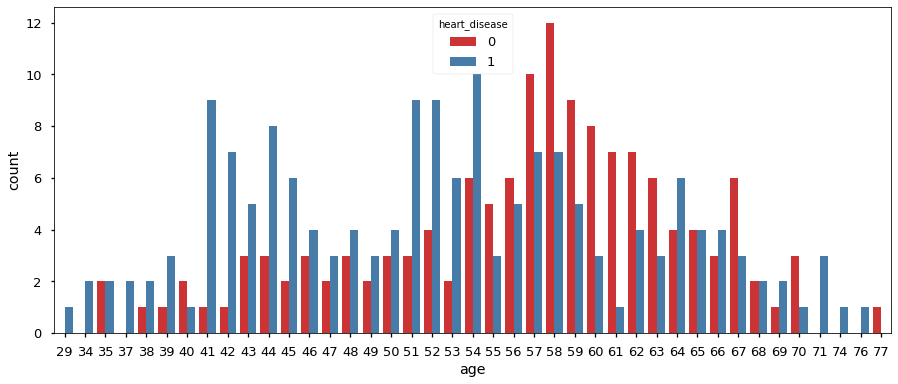

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'heart_disease',palette='Set1')
sns.set_context("paper", font_scale=1.4)
plt.show()

- 1) Patients from age 29 years to 77 years were included in this data set. The Histogram of age is little skewed to the left,showing the average age is little lower than the median age. Around 50% of patients’ age was in between 45-65 years.
- 2) We can see that the number of people having heart diseases also rises with age.

## 4.7) Scatterplot: Relationship between age and maximum heartrate acheived

<AxesSubplot:xlabel='age', ylabel='max_heartrate'>

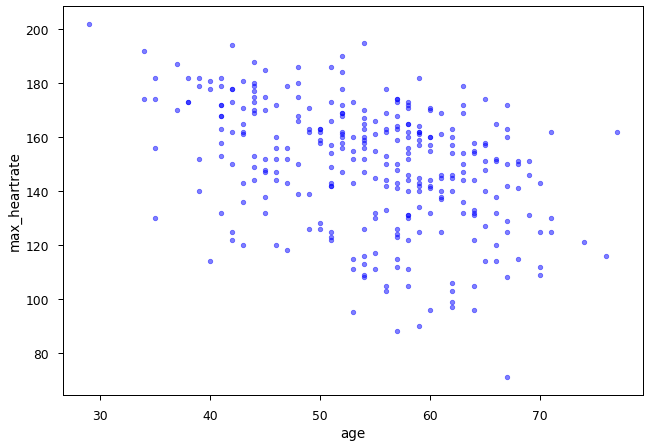

In [24]:
data.plot(kind='scatter', x='age', y='max_heartrate', color='blue', alpha=0.5)

- From Scatterplot We can see that with age the max heart rate also increases.

## 4.8) Scatterplot - Relationship between age and blood pressure

<AxesSubplot:xlabel='age', ylabel='rest_bp'>

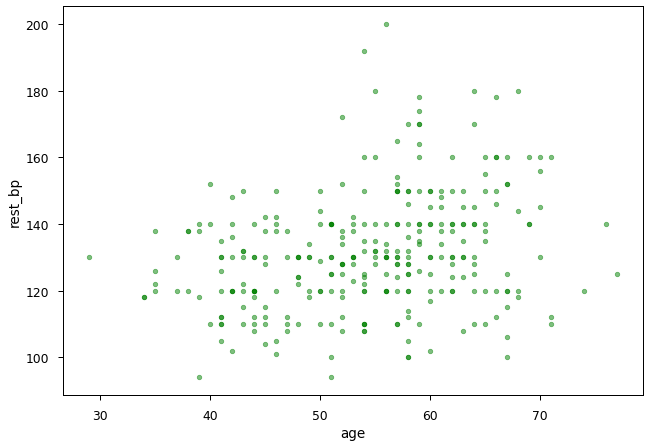

In [25]:
data.plot(kind='scatter', x='age', y='rest_bp', color='green', alpha=0.5)

- From Scatterplot we can see that more people have higher blood pressure as they age

## 4.9) Pre-processing- Standardization, or mean removal and variance scaling

- To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s.
- Let’s say we have a column Gender, with values 1 for Male and 0 for Female. It needs to be converted into two columns with the value 1 where the column would be true and 0 where it will be false.
- I used the get_dummies() method from pandas.
- I have scaled the dataset for which I have used the StandardScaler. The fit_transform() method of the scaler scales the data and we update the columns.

In [26]:
data = pd.get_dummies(data, columns = ['sex', 'chest_pain', 'fst_bloodsug', 'rest_ecg','exe_induced_angina', 'st_slope', 'majorvess_no', 'blood_disorder'])

In [44]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'rest_bp', 'cholestrol', 'max_heartrate', 'st_depression']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

# 5) Model Building and Evaluation

## 5.1) Creating Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. 
We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).

In [45]:
y = data['heart_disease']
X = data.drop(['heart_disease'], axis = 1)

In [46]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [47]:
print('Input Matrix Dimension:  ', X.shape)
print('Output Vector Dimension: ', y.shape)

Input Matrix Dimension:   (303, 30)
Output Vector Dimension:  (303,)


## 5.2) Model Building

## 5.2.1) Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
cm_rf = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



## 5.2.2) Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(loss='deviance',n_estimators=100,subsample=1.0,criterion='friedman_mse',learning_rate=1,max_depth=1, random_state=0,n_iter_no_change=None)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Gradient Boosting Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
cm_LR = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.85      0.90      0.88        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## 5.2.3) Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini') 
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.918033   0.906250  0.935484  0.920635
1         Random Forest (n=100)  0.885246   0.875000  0.903226  0.888889
2  Gradient Boosting Classifier  0.868852   0.848485  0.903226  0.875000
3                 Decision Tree  0.836066   0.838710  0.838710  0.838710
4                 Decision Tree  0.836066   0.838710  0.838710  0.838710
5         Random Forest (n=100)  0.885246   0.875000  0.903226  0.888889
6  Gradient Boosting Classifier  0.868852   0.848485  0.903226  0.875000
7                 Decision Tree  0.819672   0.812500  0.838710  0.825397


# 6) Comparison between the models

In [75]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.918033,0.906250,0.935484,0.920635
1,Random Forest (n=100),0.885246,0.875000,0.903226,0.888889
2,Gradient Boosting Classifier,0.868852,0.848485,0.903226,0.875000
3,Decision Tree,0.836066,0.838710,0.838710,0.838710
4,Decision Tree,0.836066,0.838710,0.838710,0.838710
5,Random Forest (n=100),0.885246,0.875000,0.903226,0.888889
6,Gradient Boosting Classifier,0.868852,0.848485,0.903226,0.875000
7,Decision Tree,0.819672,0.812500,0.838710,0.825397
8,Decision Tree,0.819672,0.812500,0.838710,0.825397
9,Random Forest (n=100),0.885246,0.875000,0.903226,0.888889


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

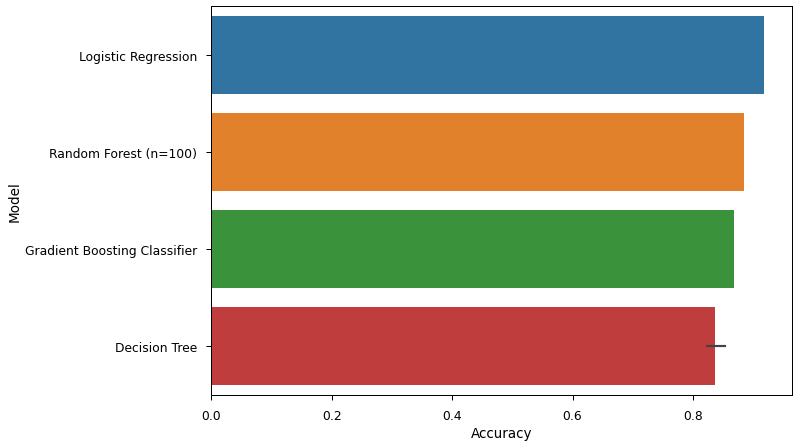

In [76]:
sns.barplot(y='Model',x='Accuracy',data=results)

To build a classification-prediction model, 3 models were trained and tested with their accuracy as follows:

- 1) Random Forest: 91 %
- 2) Gradient Boosting Classifier: 85 %
- 3) Decision Tree : 82%

# 7) Cross-validation: Evaluating estimator performance

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. 

This situation is called ***overfitting.***

One thing we can do is to split the train set in two groups, usually in 80:20 ratio ,that means we would train our model on 80% of the training data and we reserve the rest 20% for evaluating the model since we know the ground truth for this 20% data. This is the first model evaluation technique. 

In sklearn we have a train_test_split method for that.

But Train_test split has its drawbacks because this approach introduces bias as we are not using all of our observations for testing and also we're reducing the train data size. 

To overcome this we can use a technique called cross validation where all the data is used for training and testing periodically.

However, as the train set gets larger, train_test_split has its advantage over k-fold cross validation. Train_test_split is k-times faster than k-fold cross validation. 

If the training set is very large, both train_test_split and k-fold cross validation perform identically so for a large training data, train_test_split is prefered over k-fold cross validation to accelerate the training process.

## 7.1) K-Fold Cross Validation ¶

Let's say we will use 10-fold cross validation. So k = 10 and we have total 303 observations. Each fold would have 303/10 = 30 observations. So basically k-fold cross validation uses fold-1 (30.3 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy.This procedure is repeated k times (if k = 10, then 10 times); each time, a different group of observations is treated as a validation or test set. This process results in k estimates of the test accuracy which are then averaged out.

In [37]:
# Create a function that returns mean cross validation score for different models.
def val_score(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    val_score = np.round(val_score*100, 2)
    return val_score

# making the summary table of cross validation accuracy.
val_score = pd.DataFrame({'val_score(%)':[val_score(rf), val_score(gb), val_score(dt)]})
val_score.index = ['Random Foredt','Gradient Boosting Classifier', 'Decision Tree']
sorted_val_score = val_score.sort_values(by = 'val_score(%)', ascending = False)

#cross validation accuracy of the Classifiers
sorted_val_score

,val_score(%)
Random Foredt,80.15
Gradient Boosting Classifier,76.83
Decision Tree,73.15


In the above tabel, ***Random Forest*** have the highest cross validation accuracy among the remaining models.

## 7.2) Tuning Hyperparameters

Now let's add Grid Search to all the classifiers with the hopes of optimizing their hyperparameters and thus improving their accuracy. 

Are the default model parameters the best bet? Let's find out.

In [38]:
# 1 - For Decision Tree Classifier
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[46]}

# 2 - For Random Forest Classifier
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[ 10, 30, 200, 400],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[46]}

#3 - Gradient Boosting Classifier
bg_params = {
    "n_estimators":[5,50,250,500],
    "min_samples_split":[2,4,6,8,10,20,40,60,100],
    "min_samples_leaf":[1,3,5,7,9],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

***Create a function to tune hyperparameters of the selected models.***

In [39]:
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, param_grid, verbose = 3, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

***Appling tune hyperparameters in the created function***

In [40]:
# Tune Decision Tree hyperparameters
tune_hyperparameters(dt, param_grid=dt_params)
dt_best_params, dt_best_score =  best_params, best_score

Fitting 10 folds for each of 462 candidates, totalling 4620 fits


In [ ]:
# Tune Random Forest hyperparameters
tune_hyperparameters(rf, param_grid=rf_params)
rf_best_params, rf_best_score =  best_params, best_score

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [ ]:
# Tune Gradient Boosting hyperparameters
tune_hyperparameters(gb, param_grid=rf_params)
gb_best_params, gb_best_score =  best_params, best_score

***lets compares cross validation scores with tunned scores for different models.***

In [ ]:
# Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [dt_best_score, rf_best_score, gb_best_score]})
tunned_scores.index = ['LR', 'KNN', 'DT', 'RF', 'SVC', 'XGB']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)

# Models Accuracy after Optimization
sorted_tunned_scores

## 8) Different Ensemble Methods

We would first categorize ensemble methods into two subcategories like :
- 1 - Simple Ensemble Methods
- 2 - Advanced Ensemble Methods

### 8.1) Simple Ensemble Methods

They're the simpliest yet so useful form of enselbles. They can be further categorised into :

- Voting,
- Averaging and
- Weighted Average.

First one is usually used for classification while the later two are used for regression problems.

***Voting Ensemble*** : Voting ensemble is further classified into :

- Hard voting
- Soft voting.

### Hard Voting 
This hard voting method is usually used for classification problems. The idea is to train multiple models to make predictions for each data point. 

The predictions by each model are considered as a ‘vote’ ,the predictions which we get from the majority of the models are used as the final prediction. Say rf and lr predict a class as 1 while knn predicts the same class as 0.

Since the majority of the vots is casted in favour of class 1, the voting classifier would predict the very same class as 1. See the table below to understand how hard voting ensemble works.**

In [ ]:
import pandas as pd
# Example : How hard voting works
data =[[1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0]]
display(pd.DataFrame(data, columns = ['Class', 'RF', 'LR', 'GB', 'Hard_voting']).set_index('Class'))

***Correlation among Base Models Predictions:*** How base models' predictions are correlated? If base models' predictions are weakly correlated with each other, the ensemble will likely to perform better. On the other hand, for a strong correlation of predictions among the base models, the ensemble will unlikely to perform better. To sumarize, diversity of predictions among the base models is inversely proportional to the ensemble accuracy. Let's make prediction for the test set.

### 8.2)  Advanced Ensemble Methods

Advanced ensemble methods can further be classified into :

- Bagging
- Boostoing
- Stacking
- Blending

### 8.2.1) Bagging

Bagging, is shorthand for the combination of bootstrapping and aggregating. 

Bootstrapping is a method to help decrease the variance of the classifier and thus reduce overfitting. 

So the model created should be less overfitted than a single individual model. 

Bagging is more suitable for high variance low bias models (complex models). 

Random forest itself is an ensemble machine learning algorithm that follows the bagging technique. 

We would use rf as the base estimator for bagging instead of default dt. Let's try to implement bagging in sklearn

In [ ]:
# Initialize bagging classifier
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator = rf, verbose = 0, n_jobs = -1, random_state = 45)
print('Fitting Bagging Ensemble')
display(bagg.fit(X_train, y_train))
print('---Done----')

# Bagging cross validation score.
print('\nComputing Bagging X Val Score..')
bagg_x_val_score = cross_val_score(bagg, X_train, y_train, cv = 10, scoring = 'accuracy')
bagg_x_val_score = np.round(bagg_x_val_score.mean()*100, 2)
print('----Done----')

# Compare bagging ensemble score with best base models scores
bagg_vs_base_score = pd.DataFrame({'Bagging_vs_Base_Score': [bagg_x_val_score,ldt_best_score, rf_best_score, gb_best_score]})
bagg_vs_base_score.index = ['BAGG','DT', 'RF', 'GB']
display(bagg_vs_base_score)

# Conclusion

The project involved analysis of the heart disease patient dataset with proper data processing. Various factors/metrics related to heart such as angina type, major blood vessels, resting blood pressure, max heart rate, etc were analyzed. From the correlation plot, there was a positive and negative correlation observed between the heart related parameters and the count of heart diseases, which was also evident from the count plots.